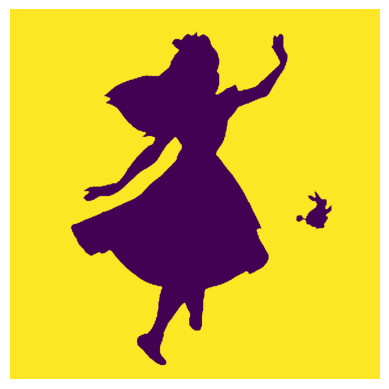

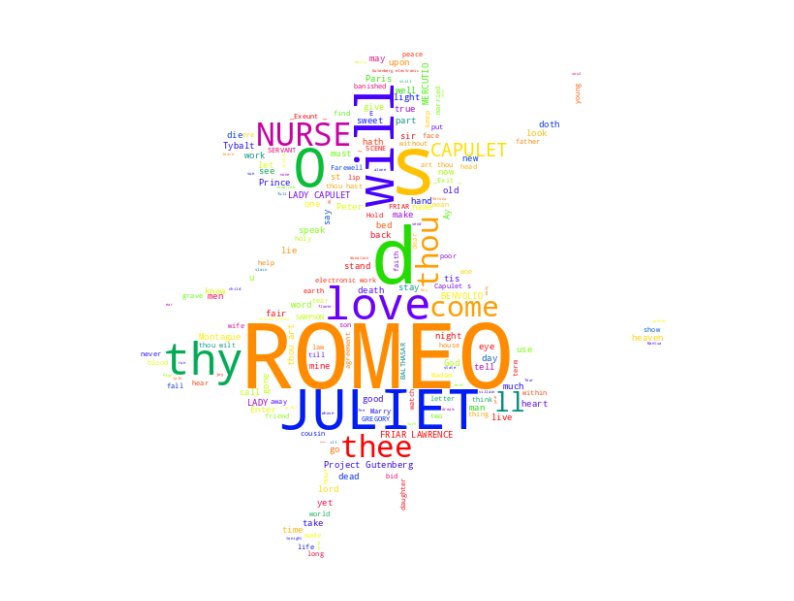

In [4]:
from textblob import TextBlob
from pathlib import Path
import imageio.v2 as imageio  # Use imageio.v2 to avoid deprecation warnings
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image  # For resizing the mask image
import numpy as np  # For converting the image back to a numpy array

# Read the text from the file
text = Path('RomeoAndJuliet.txt').read_text()

# Load the mask image using imageio.v2
#mask_image = imageio.imread('eagle.png')
mask_image = imageio.imread('alice_mask.png')

# Display the image
plt.imshow(mask_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Resize the mask image to a more manageable size (e.g., 800x600)
mask_image = Image.fromarray(mask_image).resize((800, 600), Image.Resampling.LANCZOS)
mask_image = np.array(mask_image)  # Convert back to numpy array

# Generate the word cloud with the same dimensions as the mask
wordcloud = WordCloud(
    width=800,  # Match the width of the mask
    height=600,  # Match the height of the mask
    colormap='prism',
    mask=mask_image,
    background_color='white'
)
wordcloud = wordcloud.generate(text)

# Save the word cloud to a file
wordcloud.to_file('RomeoAndJulietHeart.png')

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

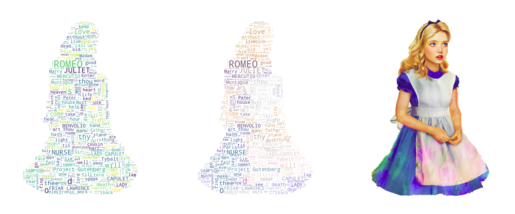

In [ ]:
#!/usr/bin/env python
"""
Image-colored wordcloud
=======================

You can color a word-cloud by using an image-based coloring strategy
implemented in ImageColorGenerator. It uses the average color of the region
occupied by the word in a source image. You can combine this with masking -
pure-white will be interpreted as 'don't occupy' by the WordCloud object when
passed as mask.
If you want white as a legal color, you can just pass a different image to
"mask", but make sure the image shapes line up.
"""

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'RomeoAndJuliet.txt')).read()

# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
alice_coloring = np.array(Image.open(path.join(d, "alice_color.png")))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show
fig, axes = plt.subplots(1, 3)
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

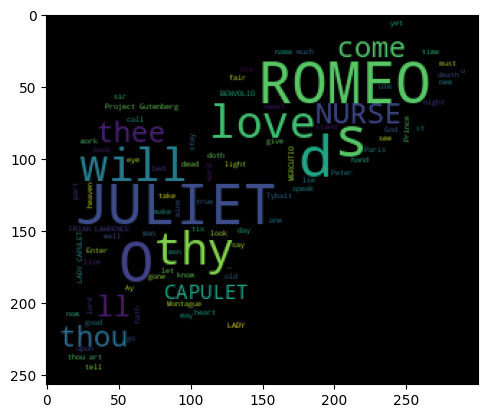

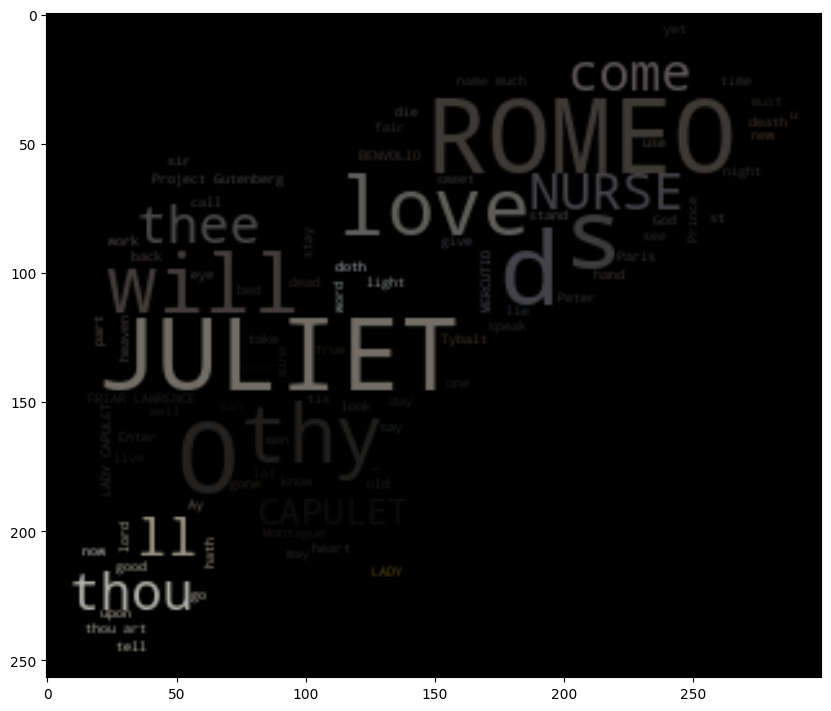

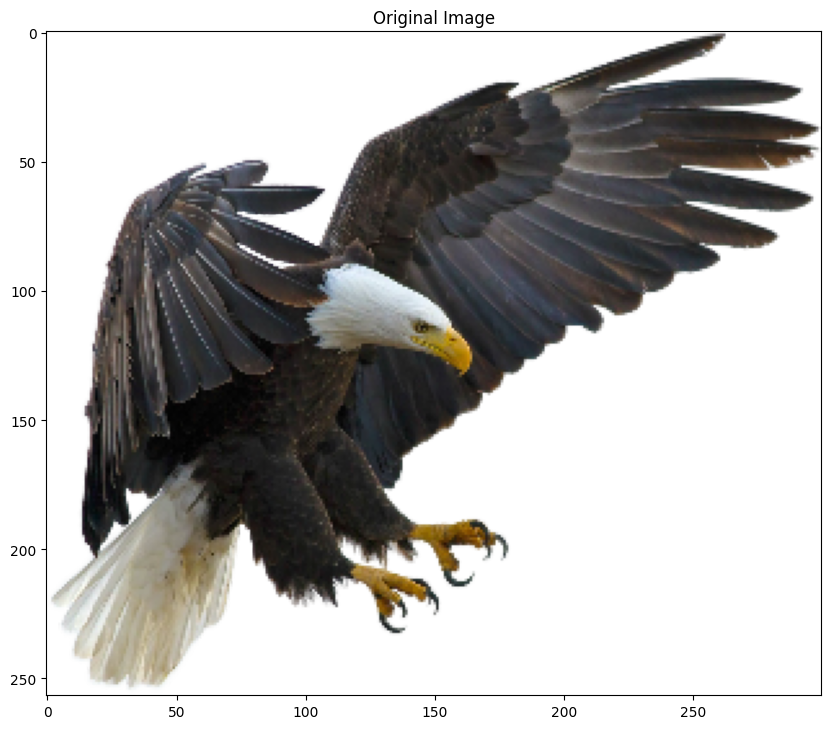

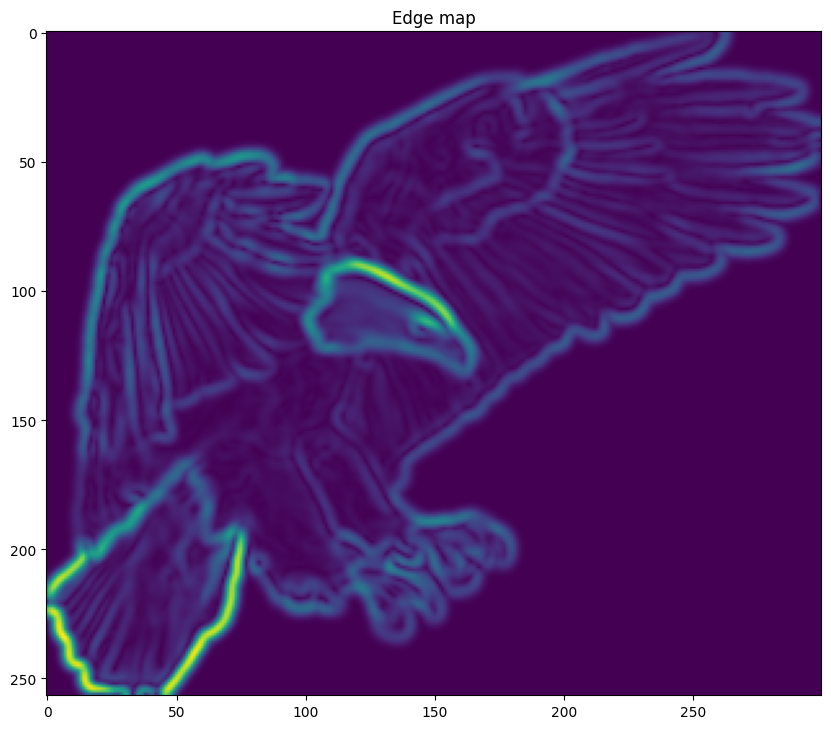

In [ ]:
"""
Image-colored wordcloud with boundary map
=========================================
A slightly more elaborate version of an image-colored wordcloud
that also takes edges in the image into account.
Recreating an image similar to the parrot example.
"""

import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load wikipedia text on rainbow
text = open(os.path.join(d, 'RomeoAndJuliet.txt'), encoding="utf-8").read()

# load image. This has been modified in gimp to be brighter and have more saturation.
eagle_color = np.array(Image.open(os.path.join(d, "eagle.png")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
eagle_color = eagle_color[::3, ::3]

# create mask  white is "masked out"
eagle_mask = eagle_color.copy()
eagle_mask[eagle_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(eagle_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
eagle_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=2000, mask=eagle_mask, max_font_size=40, random_state=42, relative_scaling=0)

# generate word cloud
wc.generate(text)
plt.imshow(wc)

# create coloring from image
image_colors = ImageColorGenerator(eagle_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("eagle_new.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(eagle_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()